# Flowers Classification
Dataset was provided by the professor.

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
data = pd.read_csv("IRIS.csv")

Check for any empty / null columns

In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no empty / null values.

We will now check the column data types.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data Analysis
Let's see how the different columns contribute to species.

<Axes: xlabel='species', ylabel='sepal_length'>

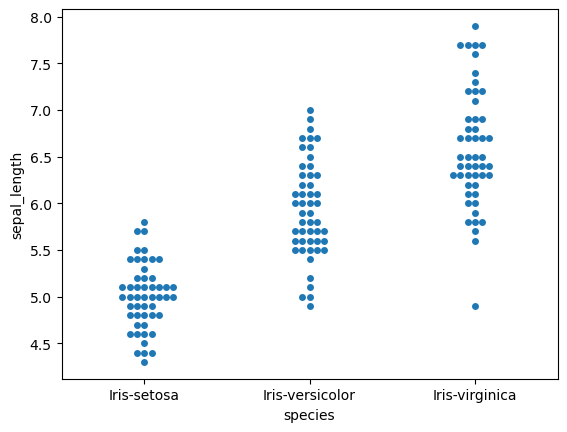

In [13]:
sns.swarmplot(x="species", y="sepal_length", data=data)

<Axes: xlabel='species', ylabel='sepal_width'>

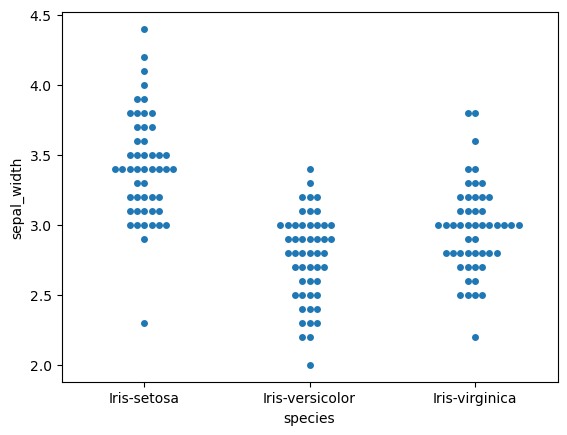

In [14]:
sns.swarmplot(x="species", y="sepal_width", data=data)

<Axes: xlabel='species', ylabel='petal_length'>

e:\Code\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


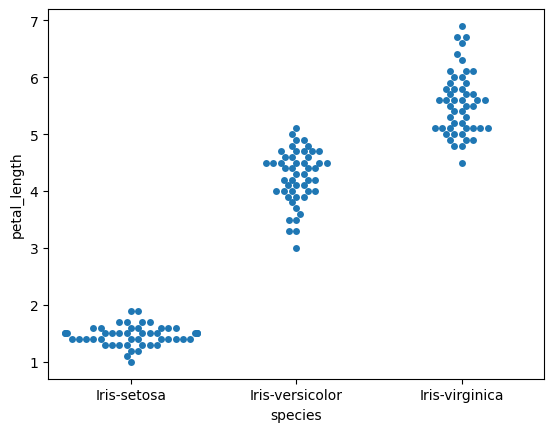

In [15]:
sns.swarmplot(x="species", y="petal_length", data=data)

e:\Code\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='species', ylabel='petal_width'>

e:\Code\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


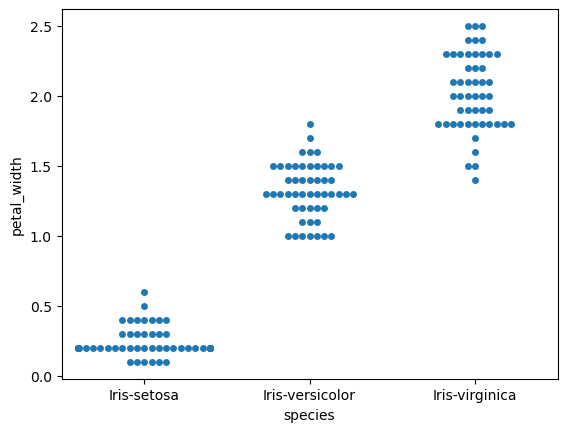

In [16]:
sns.swarmplot(x="species", y="petal_width", data=data)

We can see that there is clear correlation between the different lengths to the species.
## Machine Learning

### Number Conversion
Our target value is "species", it is a string so we will now convert it accordingly.

In [17]:
species_arr = data["species"].unique().tolist()
species_arr

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

We will be using an array to store the unique values of the species columns. We will be using the index in the array to classify its numerical value. This is done so we can be consistent between different files.

In [18]:
data["species"] = [species_arr.index(x) for x in data["species"]] if not pd.api.types.is_numeric_dtype(data["species"]) else data["species"]
data #the if statement is only used for repeated runs of this block

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Processing / Splitting

In [19]:
X = data.drop(["species"], axis=1)
Y = data["species"]

Splitting the data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Scaling the data

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=5000)
lg.fit(X_train, Y_train)

LogisticRegression(max_iter=5000)

In [23]:
from sklearn.metrics import accuracy_score

lg_prediction = lg.predict(X_train)
lg_acc = accuracy_score(Y_train, lg_prediction)
print(str(round(lg_acc * 10000) / 100) + "% Accuracy")

95.83% Accuracy


### Random Forest Classififer

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier()

In [25]:
from sklearn.metrics import accuracy_score

forest_prediction = forest.predict(X_train)
forest_acc = accuracy_score(Y_train, forest_prediction)
print(str(round(forest_acc * 10000) / 100) + "% Accuracy")

100.0% Accuracy


### KNN Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [27]:
from sklearn.metrics import accuracy_score

knn_prediction = knn.predict(X_train)
knn_acc = accuracy_score(Y_train, knn_prediction)
print(str(round(knn_acc * 10000) / 100) + "% Accuracy")

95.83% Accuracy


## Comparison of Models

We will now compare the scores of the models. Random Forest Classifier has the highest score whilst KNN has the lowest.

In [28]:
model_scores = {"Logistic Regression": lg_acc, "Random Forest Classifier": forest_acc, "KNeighborsClassifier": knn_acc}
pd.DataFrame.from_dict(model_scores, orient="index", columns=["Score"])

,Score
Logistic Regression,0.958333
Random Forest Classifier,1.000000
KNeighborsClassifier,0.958333


Now let's compare the data

In [29]:
model_predictions = {"Base": [species_arr[x] for x in Y_train],"Logistic Regression": [species_arr[x] for x in lg_prediction], "Random Forest Classifier": [species_arr[x] for x in forest_prediction], "KNeighborsClassifier": [species_arr[x] for x in knn_prediction]}
pd.DataFrame(model_predictions)

,Base,Logistic Regression,Random Forest Classifier,KNeighborsClassifier
0,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
4,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
...,...,...,...,...
115,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
116,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
117,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
